<a href="https://colab.research.google.com/github/olexandr7/erm_workshop/blob/main/ERM_workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workshop 2** is focused on trying out image manipulation

Let's now pick an image from MuIS and try several operations:
* inverting image
* changing image colorspace
* visual pattern matching

**Block 1**: installing relevant libraries for image manipulation

In [1]:
# Importing/installing libraries
%pip install cvlib
%matplotlib inline
#------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import requests
#------------------
from PIL import Image
from cvlib.object_detection import draw_bbox
from google.colab.patches import cv2_imshow
from skimage import io
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046366 sha256=6dcbcb5a85060cc222e30a52463ec5d5ba82961725a293f00e06c3f6e9ed6842
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=a139aa2e8ccb8014ebf086e2354efea28035c75867f3036a980eb3243171f60b
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


**Block 2**: loading image from MuIS
string
<br>  <font color='orange'>Action point:</font> Try changing URL to any image from MuIS (right click on image -> copy image link) https://www.muis.ee/museaalview/1887998

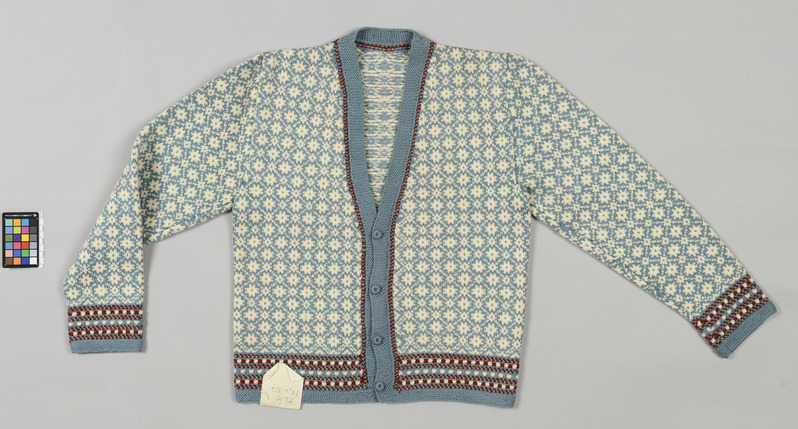

In [2]:
#Loading image
url = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=dbcd28ca-89e3-4c13-b6e8-b0cbc889c771"  #<---  URL could be changed to any image from MuIS
url_response = urllib.request.urlopen(url)
img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)
cv2_imshow(img)

**Block 3**: Performing image manipulations
<br>  <font color='orange'>Action point:</font> Try changing the code below to display only 1 image (not 3) - inverted

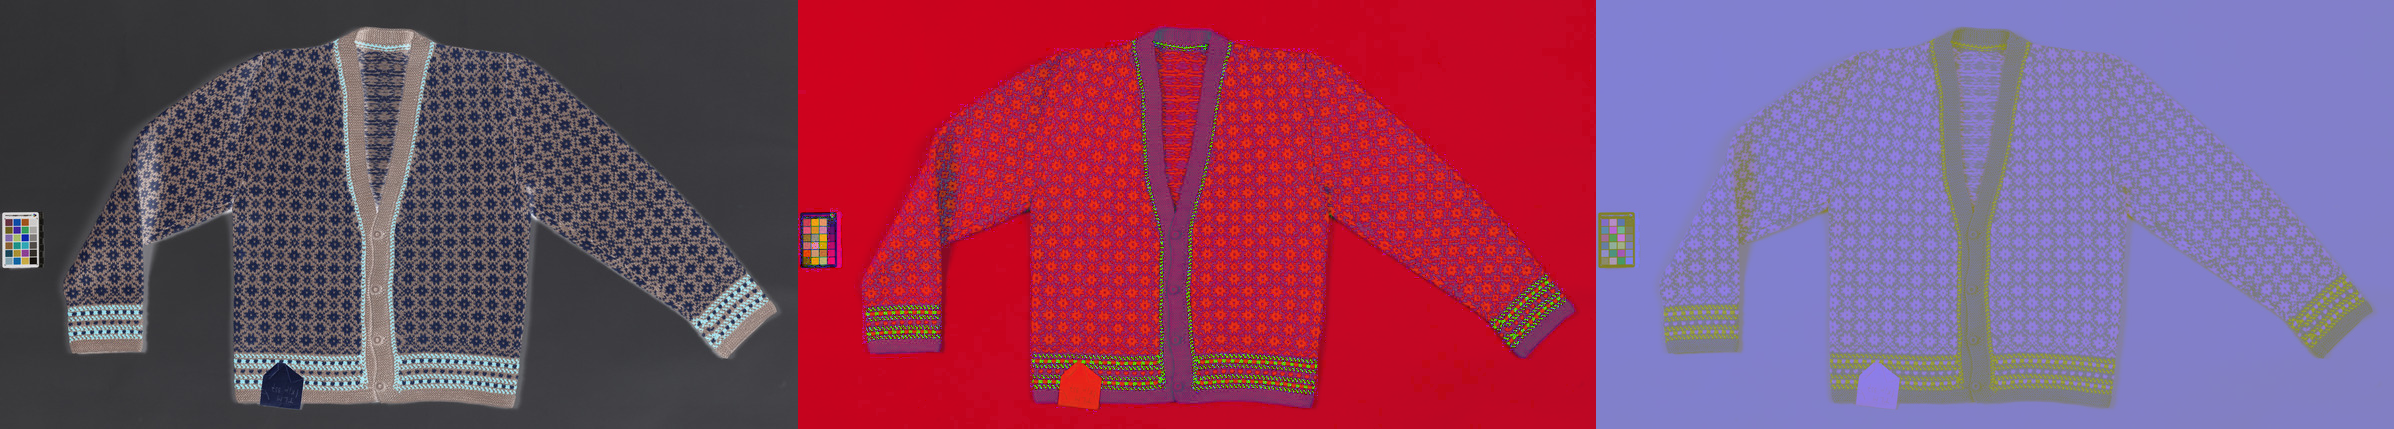

In [3]:
#Inverting image
inverted = cv2.bitwise_not(img)
#Setting image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#Setting image to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#Creating a collage of all modified images
img_all = np.hstack([inverted,  hsv, lab])
#displaying all modified images
cv2_imshow(img_all)

**Block 4**: Template matching - loading and preparing MuIS images
<br>  <font color='orange'>Action point:</font> Try changing URLs for image and template for a suitable combination from MuIS

In [4]:
#Choosing image and template - code taken from opencv tutorial at:
#https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

#Loading image and template
url_img = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=236f05e6-4060-4190-9eaf-0f0f70e0d09e"       #<---  URL could be changed to any image from MuIS
url_template = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=5120c5cc-6e75-4dca-a366-df361a138f8a"  #<---  URL could be changed to any image from MuIS

#loading images
url_response_img = urllib.request.urlopen(url_img)
img = cv2.imdecode(np.array(bytearray(url_response_img.read()), dtype=np.uint8), -1)
url_response_template = urllib.request.urlopen(url_template)
template = cv2.imdecode(np.array(bytearray(url_response_template.read()), dtype=np.uint8), -1)
#setting to grey color palette
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
#type conversion
img = img.astype(np.uint8)
template = template.astype(np.uint8)

#verifying that images are loaded
if img is None or template is None:
    print('Could not open or find the images!')
else:
    print('Images successfully loaded!')

#resizing (keeping just in case - sometimes needed to resize template)
#template = cv2.resize(template, (0, 0), fx = 0.1, fy = 0.1)

Images successfully loaded!


**Block 5**: Applying and visualizing pattern matching
<br>  <font color='orange'>Action point:</font> Try changing the titles on displayed match results

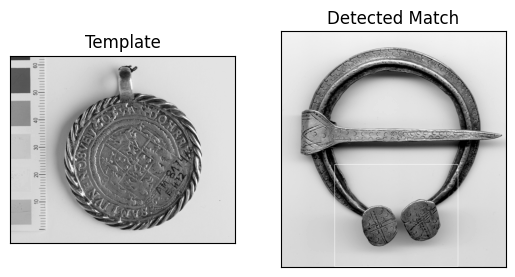

In [5]:
#https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html
#Setting pre-requisites for template/pattern matching
w, h = template.shape[::-1]
img2 = img.copy()
img = img2.copy()
method = eval('cv2.TM_CCOEFF') #<--- algorithm used to match

# Applying template matching
res = cv2.matchTemplate(img, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# Visualizing template matching
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(template, cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])         #<---  title could be changed
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Detected Match'), plt.xticks([]), plt.yticks([])   #<---  title could be changed
plt.show()